# Exercise 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import svm
%matplotlib inline
from IPython.display import Image


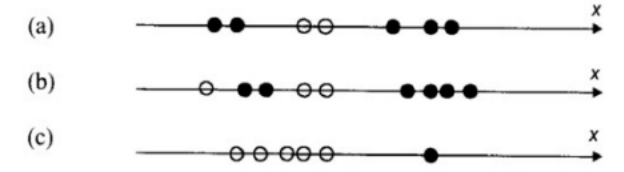

In [2]:
Image(filename='fig1.png') 


In [3]:


# print xa[:,0]
# print xa[:,0].min() - 1


In [4]:
class Classifier:
    
    def __init__(self):
        pass
    
    
    def svm_classifier(self, k,  x, y, d):
        
        
        clf = svm.SVC(kernel = k, coef0=1, probability=True, degree=d, gamma=2)
        clf.fit(x,y)
        
        return clf

    #make mesh grid
    def make_meshgrid(self, xa, h=0.1):


        """Create a mesh of points to plot in
        Parameters
        ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

        Returns
        -------
        xx, yy : ndarray
        """

        x_min, x_max = xa[:,0].min() - 1, xa[:,0].max() + 1
        y_min, y_max = xa[:,1].min() - 1, xa[:,1].max() + 1 
        h = 0.2
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                 np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(self, ax, clf, xx, yy, **params):

        """Plot the decision boundaries for a classifier.

        Parameters
        ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
        """

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
#         plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)
#         plt.scatter(xa[:,0],xa[:,1], c = ya, cmap=plt.cm.coolwarm)
#         plt.title("classification")
#         plt.axis("tight")
        plt.grid()
#         plt.show()




What is the lowest-order polynomial decision function that can correctly classify the given data? Black dots denote class 1 with target function value y1 = +1 and white dots depict class 2 with targets y2 = -1. What are the decision boundaries? 



In [5]:
def plot(data,y):
    for i in range(len(data)):
        if y[i] == 1:
            plt.scatter(data[i][0],data[i][1],color='r')
        else:
            plt.scatter(data[i][0],data[i][1],color='b')

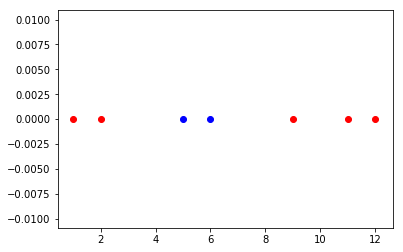

In [6]:
#a
xa = np.array([[1,0],[2,0],[5,0],[6,0],[9,0],[11,0],[12,0]])
ya = np.array([1,1,-1,-1,1,1,1])
plot(xa,ya)

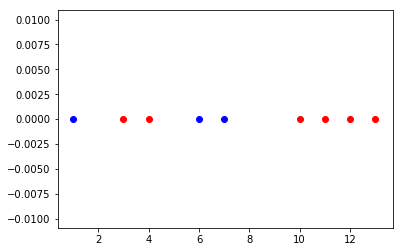

In [9]:
#b
xb = np.array([[1,0],[3,0],[4,0],[6,0],[7,0],[10,0],[11,0],[12,0],[13,0]])
yb = np.array([-1,1,1,-1,-1,1,1,1,1])
plot(xb,yb)


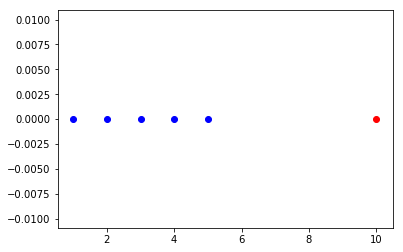

In [10]:
#c 
xc = np.array([[1,0],[2,0],[3,0],[4,0],[5,0],[10,0]])
yc = np.array([-1,-1,-1,-1,-1,1])
plot(xc,yc)

#classifier
classifer = Classifier()

## Polynomial Classifier using xa, ya 

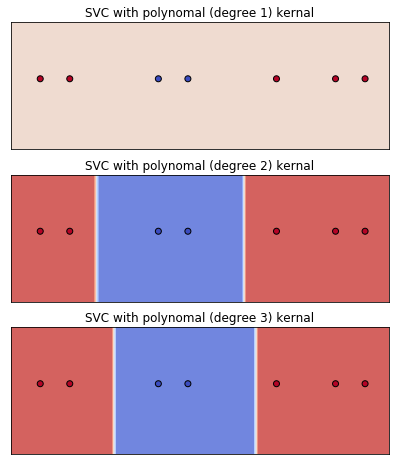

In [4]:
# clf = classifer.svm_classifier('poly', xa, ya, degree)
models = (classifer.svm_classifier('poly', xa, ya, 1),
          classifer.svm_classifier('poly', xa, ya, 2),
          classifer.svm_classifier('poly', xa, ya, 3))

# title for the plots
titles = ('SVC with polynomal (degree 1) kernal',
          'SVC with polynomal (degree 2) kernal',
          'SVC with polynomal (degree 3) kernal',)

# Set-up 2x1 grid for plotting.
fig, sub = plt.subplots(3, 1)
# plt.subplots_adjust(wspace=2, hspace=2)
plt.subplots_adjust(bottom=1.0, right=1.0, top=2.5)
xx, yy =  classifer.make_meshgrid(xa)



for clf, title, ax in zip(models, titles, sub.flatten()):
    ax.grid(True)
    classifer.plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(xa[:,0], xa[:,1], c=ya, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

## Polynomial Classifier using xb, yb

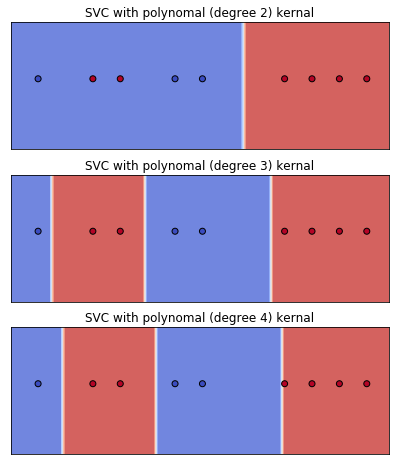

In [5]:
models = (classifer.svm_classifier('poly', xb, yb, 2),
          classifer.svm_classifier('poly', xb, yb, 3),
          classifer.svm_classifier('poly', xb, yb, 4))

# title for the plots
titles = ('SVC with polynomal (degree 2) kernal',
          'SVC with polynomal (degree 3) kernal',
          'SVC with polynomal (degree 4) kernal',)

# Set-up 2x1 grid for plotting.
fig, sub = plt.subplots(3, 1)
# plt.subplots_adjust(wspace=2, hspace=2)
plt.subplots_adjust(bottom=1.0, right=1.0, top=2.5)
xx, yy =  classifer.make_meshgrid(xb)

for clf, title, ax in zip(models, titles, sub.flatten()):
    ax.grid(True)
    classifer.plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(xb[:,0], xb[:,1], c=yb, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

## Polynomial Classifier with xc, yc


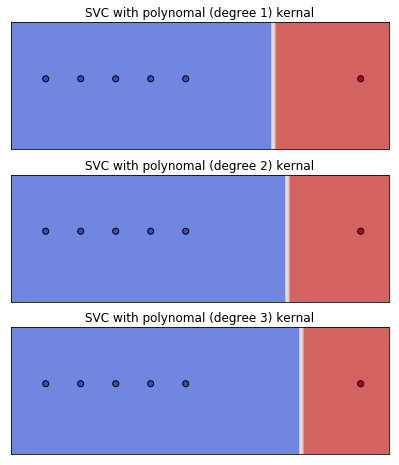

In [6]:
models = (classifer.svm_classifier('poly', xc, yc, 1),
          classifer.svm_classifier('poly', xc, yc, 2),
          classifer.svm_classifier('poly', xc, yc, 3))

# title for the plots
titles = ('SVC with polynomal (degree 1) kernal',
          'SVC with polynomal (degree 2) kernal',
          'SVC with polynomal (degree 3) kernal',)

# Set-up 2x1 grid for plotting.
fig, sub = plt.subplots(3, 1)
# plt.subplots_adjust(wspace=2, hspace=2)
plt.subplots_adjust(bottom=1.0, right=1.0, top=2.5)
xx, yy =  classifer.make_meshgrid(xc)

for clf, title, ax in zip(models, titles, sub.flatten()):
    ax.grid(True)
    classifer.plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(xc[:,0], xc[:,1], c=yc, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

### Conclusion

Above examples show that, for diagram a; when we use polynomial degree 2 and 3, it draws the decision boundaries. Therefore, lowest order of polynomial function is 2, that can separate two classes linearly.
While for diagram b and c; lowest order of polynomial function is 1

# Exercise 3

In [2]:
class StateVectorMachine:
    def __init__(self,_radius,_width,_distance,_num_of_training_set,
                 _num_of_testing_set):
        self.radius = _radius
        self.width = _width
        self.distance = _distance
        self.num_of_training_set = _num_of_training_set
        self.num_of_testing_set = _num_of_testing_set
        
    def generate_sample(self,_class):
        random_theta = np.pi *  random.random()
        random_r = (self.width*random.random())+(self.radius-self.width)
        if _class is 1:
            x = random_r*np.cos(random_theta)
            y = random_r*np.sin(random_theta) 
            return [x,y,1]
        else:
            random_theta += np.pi
            x = random_r*np.cos(random_theta)+(self.radius-(self.width/2.0))
            y = random_r*np.sin(random_theta)-self.distance
            return [x,y,2]
        
    def get_samples(self,_flag):
        samples = np.empty((0,3))
        
        if _flag is "train":
            _no_of_samples = self.num_of_training_set
        else:
            _no_of_samples = self.num_of_testing_set
        
        """
        - generating number of samples 
        - half samples belongs to region A and 
          remaining half samples belongs to region B
        """
        for i in range(_no_of_samples):
            sample = self.generate_sample(1 if (i<_no_of_samples/2) else 2)
            samples = np.vstack([samples,sample])
        
        #returning samples and desired output
        return samples[:,0:2],samples[:,2:3]
    
    def plot(self,points,output,title):
        plt.figure(figsize=(10, 7))
        plt.grid(True)
        plt.title(title)
        plt.xlabel("x-->")
        plt.ylabel("y-->")
        for index,point in enumerate(points):
            if (output[index] == 1.0):
                plt.plot(point[0],point[1],'r+',label='region a')
            else:
                plt.plot(point[0],point[1],'b+',label='region b')

    def train(self,training_input,desired_output):
        classifier = svm.SVC(kernel='linear')
        classifier.fit(training_input, desired_output)
        return classifier
        

/home/ramesh/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


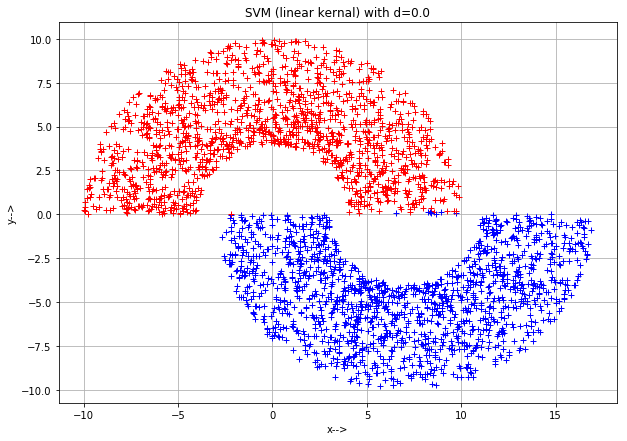

In [3]:
radius = 10.0
width = 6.0
distance = 0.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

# initializing state vector machine with initial parameteres
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)

# generating random training samples and desired output
training_input,desired_output = state_vector_machine.get_samples("train")

# training the state vector machine
classifier = state_vector_machine.train(training_input,desired_output)

# generating random testing samples 
test_samples,test_desired_output = state_vector_machine.get_samples("test")

# predicting the output for test samples and ploting the result
predicted_output = classifier.predict(test_samples)
state_vector_machine.plot(test_samples,predicted_output,"SVM (linear kernal) with d=0.0")

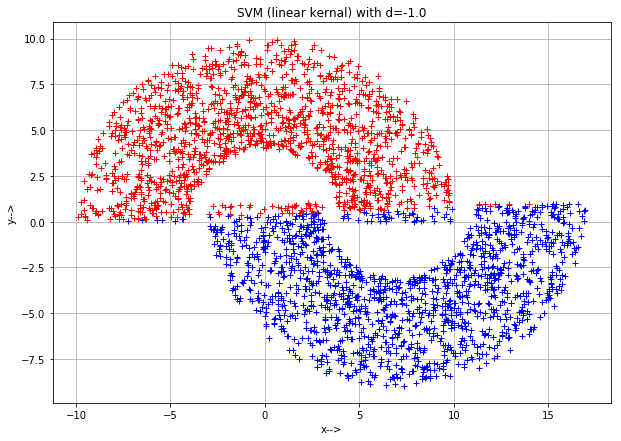

In [4]:
radius = 10.0
width = 6.0
distance = -1.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

# initializing state vector machine with initial parameteres
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)

# generating random training samples and desired output
training_input,desired_output = state_vector_machine.get_samples("train")

# training the state vector machine
classifier = state_vector_machine.train(training_input,desired_output)

# generating random testing samples 
test_samples,test_desired_output = state_vector_machine.get_samples("test")

# predicting the output for test samples and ploting the result
predicted_output = classifier.predict(test_samples)
state_vector_machine.plot(test_samples,predicted_output,"SVM (linear kernal) with d=-1.0")

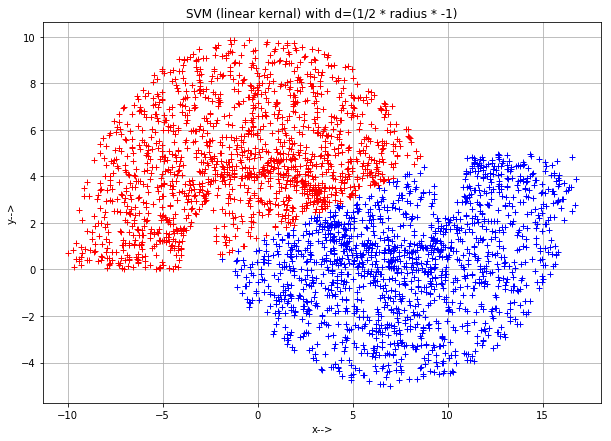

In [5]:
radius = 10.0
width = 6.0
distance = 0.5 * (radius) * -1.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

# initializing state vector machine with initial parameteres
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)

# generating random training samples and desired output
training_input,desired_output = state_vector_machine.get_samples("train")

# training the state vector machine
classifier = state_vector_machine.train(training_input,desired_output)

# generating random testing samples 
test_samples,test_desired_output = state_vector_machine.get_samples("test")

# predicting the output for test samples and ploting the result
predicted_output = classifier.predict(test_samples)
state_vector_machine.plot(test_samples,predicted_output,"SVM (linear kernal) with d=(1/2 * radius * -1)")

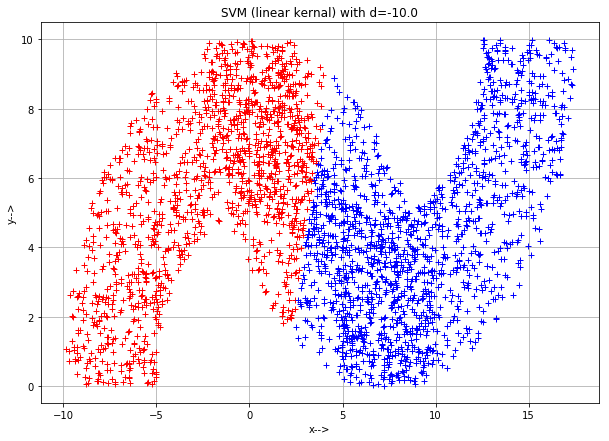

In [6]:
radius = 10.0
width = 5.0
distance = -10.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

# initializing state vector machine with initial parameteres
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)

# generating random training samples and desired output
training_input,desired_output = state_vector_machine.get_samples("train")

# training the state vector machine
classifier = state_vector_machine.train(training_input,desired_output)

# generating random testing samples 
test_samples,test_desired_output = state_vector_machine.get_samples("test")

# predicting the output for test samples and ploting the result
predicted_output = classifier.predict(test_samples)
state_vector_machine.plot(test_samples,predicted_output,"SVM (linear kernal) with d=-10.0")